In [4]:
import matplotlib.pyplot as plt

In [1]:
from pysdtw import SoftDTW
import torch
# Create the sequences
batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
# Transfer tensors to the GPU
#x = x.cuda()
#y = y.cuda()
#
# Create the "criterion" object
sdtw = SoftDTW(use_cuda=False, gamma=0.1)

loss = sdtw(x, y)  # Just like any torch.nn.xyzLoss()


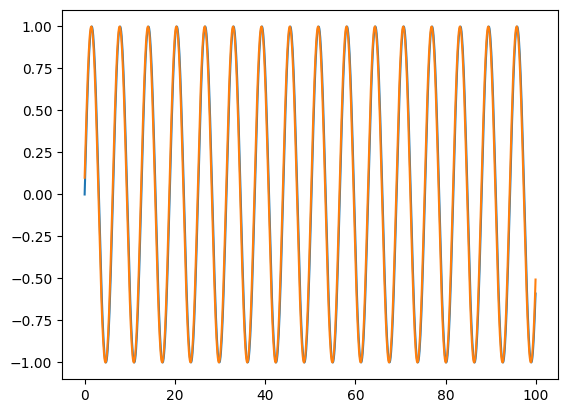

In [138]:
x = torch.arange(0, 100, .1)

y1 = torch.sin(x)
y2 = torch.sin(x+.1)

plt.plot(x, y1)
plt.plot(x, y2)

In [139]:
y1_b = y1.unsqueeze(-1).unsqueeze(0)
y2_b = y2.unsqueeze(-1).unsqueeze(0)

y1_b.shape

torch.Size([1, 1000, 1])

In [140]:
sdtw(y1_b, y2_b)

tensor([-153.2514])

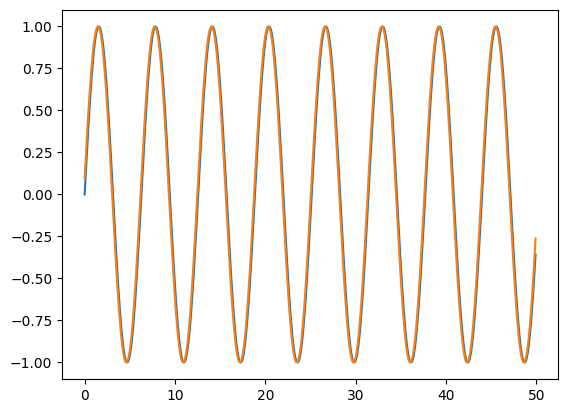

In [141]:
x2 = torch.arange(0, 50, .1)

z1 = torch.sin(x2)
z2 = torch.sin(x2+.1)

plt.plot(x2, z1)
plt.plot(x2, z2)
plt.show()

z1_b = z1.unsqueeze(-1).unsqueeze(0)
z2_b = z2.unsqueeze(-1).unsqueeze(0)

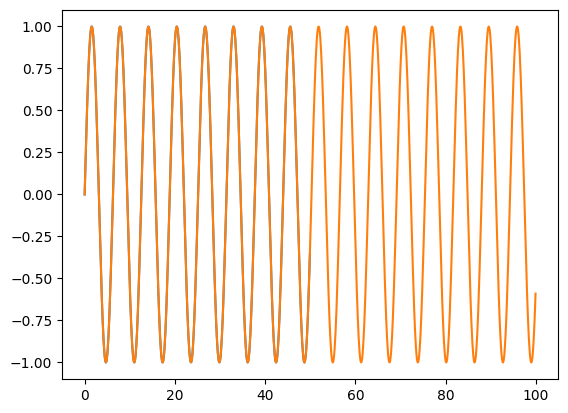

In [142]:
plt.plot(x2, z1)
plt.plot(x, y1)

In [143]:
sdtw(z1_b, z2_b)

tensor([-76.5081])

In [144]:
sdtw(z1_b, z2_b)/sdtw(y1_b, y2_b)

tensor([0.4992])

In [145]:
sdtw(z1_b, z2_b)/len(z1), sdtw(y1_b, y2_b)/len(y1)

(tensor([-0.1530]), tensor([-0.1533]))

In [174]:
class MeanSoftDTW(torch.nn.Module):
    def __init__(self, gamma=.1):
        super().__init__()

        self.stdw = SoftDTW(gamma=.1, use_cuda=False)

    def forward(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        x = x.cpu()
        y = y.cpu()

        input1 = torch.cat([x,x,y])
        input2 = torch.cat([y,x,y])

        loss: torch.Tensor = self.stdw(input1, input2)

        loss_xy, loss_xx, loss_yy = torch.split(loss, x.shape[0])

        #loss_xy /= x.shape[1]
        #loss_xx /= x.shape[1]
        #loss_yy /= x.shape[1]

        loss = loss_xy - 1/2*(loss_xx+loss_yy)
        
        loss = loss.mean()
        loss = loss.to(x.device)

        return loss

In [175]:
msdtw = MeanSoftDTW()

In [176]:
seq_len = len(x)

In [177]:
msdtw(y1_b, y2_b)

tensor(0.0470)

In [178]:
msdtw(y1_b[:,:seq_len//2], y2_b[:,:seq_len//2])

tensor(0.0511)

In [179]:
msdtw = MeanSoftDTW(.001)
hist = []

for i in range(1, seq_len, 10):
    hist.append(msdtw(y1_b[:,:i], y2_b[:,:i]))

In [180]:
import numpy as np

In [181]:
x_size = np.array(range(1, seq_len, 10))
hist = np.array(hist)

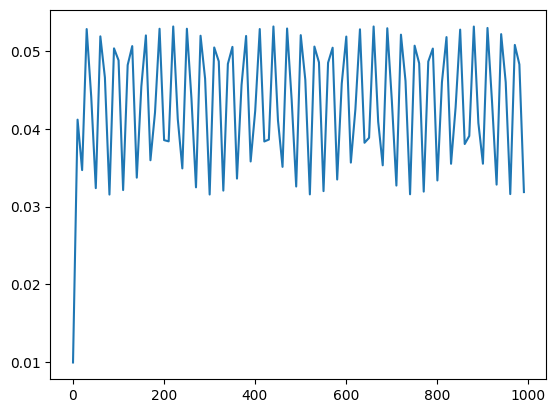

In [182]:
plt.plot(x_size, hist)

In [150]:
msdtw(y1_b, y2_b)/msdtw(z1_b, z2_b)

tensor(0.8685)

In [111]:
s1 = sdtw(y1_b, y2_b) - 1/2*(sdtw(y1_b, y1_b)+sdtw(y2_b,y2_b))
s1

tensor([0.0502])

In [110]:
s2 = sdtw(z1_b, z2_b) - 1/2*(sdtw(z1_b, z1_b)+sdtw(z2_b,z2_b))
s2

tensor([0.0405])

In [113]:
s1 = msdtw(y1_b, y2_b) - 1/2*(msdtw(y1_b, y1_b)+msdtw(y2_b,y2_b))
s2 = msdtw(z1_b, z2_b) - 1/2*(msdtw(z1_b, z1_b)+msdtw(z2_b,z2_b))
s1, s2

(tensor(0.0005), tensor(0.0002))

In [95]:
s1/s2

tensor([1.2393])

In [96]:
s1/len(x), s2/len(x2)

(tensor([0.0005]), tensor([0.0002]))

In [98]:
sdtw2 = SoftDTW(False, .1, True)

In [99]:
sdtw2(y1_b, y2_b)

tensor([0.0502])

In [100]:
sdtw2(z1_b, z2_b)

tensor([0.0405])